In [8]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
fnames = ['test_own_killer', 'test_boosting_hunter', 'test_boosting_hunter_reduced', 'test_tournament']
fname  = fnames[3] 
with open('data/' + fname + '.json', 'r') as file:
    data = json.load(file)

In [10]:
names  = []

steps    = []
invalid  = []
suicides = []

score   = []
coins   = []
kills   = []
rounds  = []

for agent in data['by_agent']:
    try:
        steps.append(data['by_agent'][agent]['steps'])
    except:
        steps.append(0)
    try:
        invalid.append(data['by_agent'][agent]['invalid'])
    except:
        invalid.append(0)
    try: 
        suicides.append(data['by_agent'][agent]['suicides'])
    except:
        suicides.append(0)
    try:
        score.append(data['by_agent'][agent]['score'])
    except:
        score.append(0)
    try:
        coins.append(data['by_agent'][agent]['coins'])
    except:
        coins.append(0)
    try:
        kills.append(data['by_agent'][agent]['kills'])
    except:
        kills.append(0)
    try:
        rounds.append(data['by_agent'][agent]['rounds'])
    except:
        rounds.append(0)
    strings = ['_', '0', '1', '2', '3']
    replace = [' ', '', '', '', '']
    for s, r in zip(strings, replace):
        agent = agent.replace(s, r)
    names.append(agent)
        
steps    = np.array(steps)
invalid  = np.array(invalid)
suicides = np.array(suicides)
score    = np.array(score)
coins    = np.array(coins)
kills    = np.array(kills)
rounds   = np.array(rounds)

In [11]:
df = pd.DataFrame(data=[steps, invalid, suicides, score, coins, kills, rounds], columns=names, index=['steps', 'invalid', 'suicides', 'score', 'coins', 'kills', 'rounds'])
display(df)

,boosting hunter,boosting hunter reduced,own killer,rule based agent
steps,12015,14110,22118,16594
invalid,1972,2760,223,469
suicides,68,63,15,67
score,278,286,548,279
coins,213,196,303,179
kills,13,18,49,20
rounds,100,100,100,100


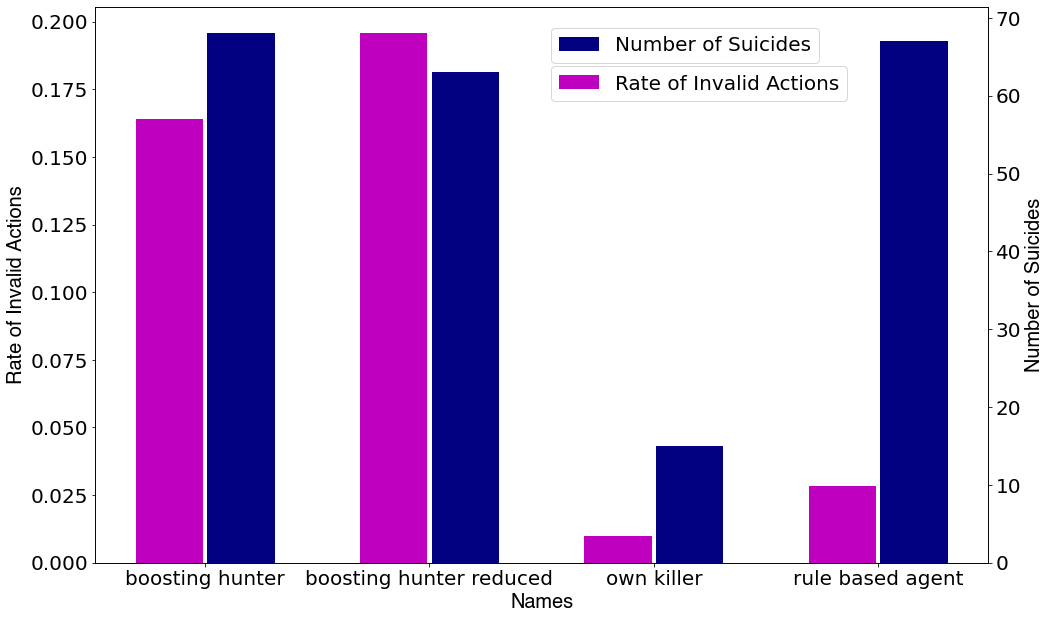

In [12]:
# trainings plot
plt.rc('font', size=20) 
fig, ax1 = plt.subplots(figsize=(15, 9))

x = np.arange(len(names))
plt.xticks(x, names)

ax2 = ax1.twinx()

ax1.bar(x - 0.16, invalid/steps, width=-0.3, align='center', color='m', label='Rate of Invalid Actions')
ax2.bar(x + 0.16, suicides, width=0.3, align='center', color='navy', label='Number of Suicides')

ax1.set_ylabel('Rate of Invalid Actions', fontname='Helvetica')
ax1.set_xlabel('Names', fontname='Helvetica')
ax2.set_ylabel('Number of Suicides', fontname='Helvetica')


ax1.legend(loc=(0.51, 0.83))
ax2.legend(loc=(0.51, 0.9))

plt.xticks(x, names)
#plt.title('Measurement of Training', fontname='Helvetica')
plt.tight_layout()

plt.savefig('images/training_' + fname + '.png', dpi=500)
plt.show()

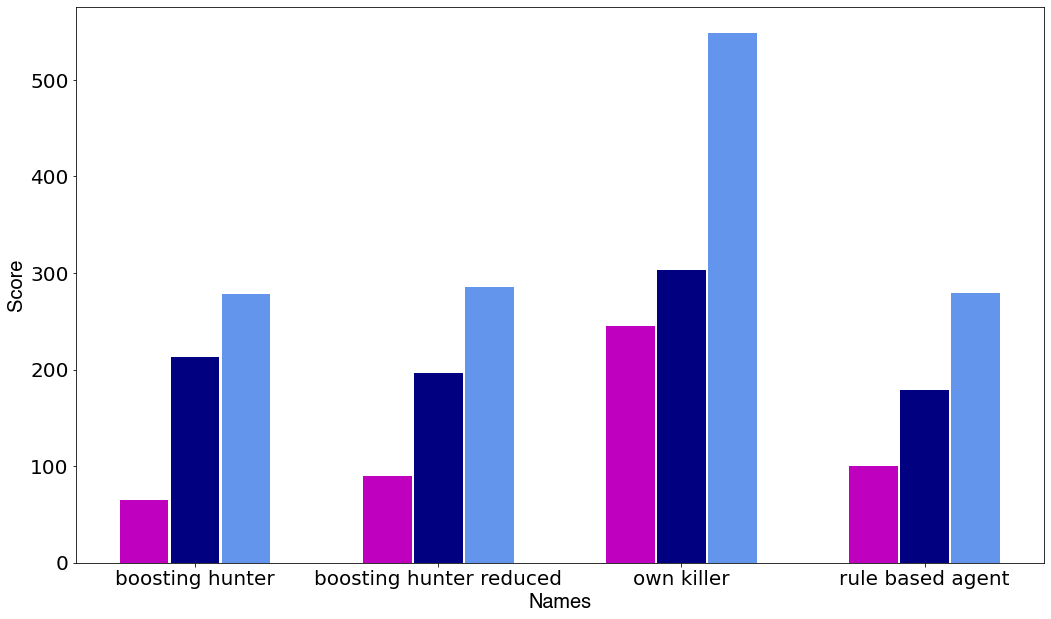

In [13]:
# performance plot
plt.rc('font', size=20) 
fig, ax1 = plt.subplots(figsize=(15, 9))

x = np.arange(len(names))
ax1.bar(x+0.21, score, width=0.2, align='center', color='cornflowerblue', label='Total Score')
ax1.bar(x, coins, width=0.2, align='center', color='navy', label='Coin Score')
ax1.bar(x-0.21, kills*5, width=0.2, align='center', color='m', label='Kill Score')

ax1.set_ylabel('Score', fontname='Helvetica')
ax1.set_xlabel('Names', fontname='Helvetica')

plt.xticks(x, names)
#plt.title('Measurement of Performance', fontname='Helvetica')
plt.tight_layout()

plt.savefig('images/performance_' + fname + '.png', dpi=500)
plt.show()